<a href="https://colab.research.google.com/github/crazy85128x/ML0930/blob/master/cnn_gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [10]:
trans = [
    "airplane",										
    "automobile",										
    "bird",							
    "cat",									
    "deer",										
    "dog",									
    "frog",										
    "horse",										
    "ship",									
    "truck"
]


In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

ans  deer


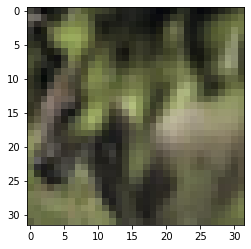

In [13]:
import random
import matplotlib.pyplot as plt

idx = random.randint(0, x_train.shape[0]-1)
print("ans ", trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
layers = [
    # 27(1 filter) * 64 + 64 -> 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 576(1 filter) * 128 + 128 -> 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
global_average_pooling2d (Gl (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [15]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [16]:
x_train_norm=x_train/255
x_test_norm=x_test/255

In [17]:
# epoch: 整份資料要看幾遍
# 60000筆, 2epoch, 200batch -> 60000 * 2 / 200次調整
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm, 
     y_train,
     batch_size=100,
     epochs=100,
     validation_split=0.1,
     callbacks=callbacks,
     verbose=2)

Epoch 1/100
450/450 - 4s - loss: 1.7710 - accuracy: 0.3366 - val_loss: 1.5576 - val_accuracy: 0.3994
Epoch 2/100
450/450 - 3s - loss: 1.4598 - accuracy: 0.4702 - val_loss: 1.3963 - val_accuracy: 0.4830
Epoch 3/100
450/450 - 3s - loss: 1.3086 - accuracy: 0.5282 - val_loss: 1.2686 - val_accuracy: 0.5522
Epoch 4/100
450/450 - 3s - loss: 1.2106 - accuracy: 0.5690 - val_loss: 1.1669 - val_accuracy: 0.5868
Epoch 5/100
450/450 - 3s - loss: 1.1299 - accuracy: 0.5977 - val_loss: 1.1070 - val_accuracy: 0.6028
Epoch 6/100
450/450 - 3s - loss: 1.0615 - accuracy: 0.6250 - val_loss: 1.0880 - val_accuracy: 0.6092
Epoch 7/100
450/450 - 3s - loss: 1.0164 - accuracy: 0.6399 - val_loss: 0.9922 - val_accuracy: 0.6520
Epoch 8/100
450/450 - 3s - loss: 0.9564 - accuracy: 0.6644 - val_loss: 0.9382 - val_accuracy: 0.6766
Epoch 9/100
450/450 - 3s - loss: 0.9340 - accuracy: 0.6708 - val_loss: 0.9175 - val_accuracy: 0.6820
Epoch 10/100
450/450 - 3s - loss: 0.8955 - accuracy: 0.6871 - val_loss: 0.8952 - val_accura

In [18]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6640 - accuracy: 0.7794


[0.6640439033508301, 0.7793999910354614]